Use scanpy to normalize the spots in the sample and then cluster based on transcription, such that brain subregions separate, then visualize on the tissue section.

/var/folders/3_/kq6fv1_d4gl_n25bl_c016gc0000gn/T/ipykernel_9643/83165016.py:7: FutureWarning: Use `squidpy.read.visium` instead.
  adata = sc.read_visium(visium_path)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata

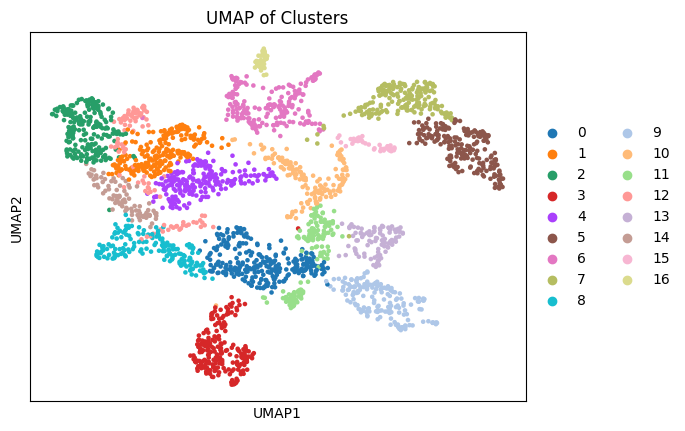

/var/folders/3_/kq6fv1_d4gl_n25bl_c016gc0000gn/T/ipykernel_9643/83165016.py:29: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color="leiden", title="Spatial Clustering of Hippocampus")


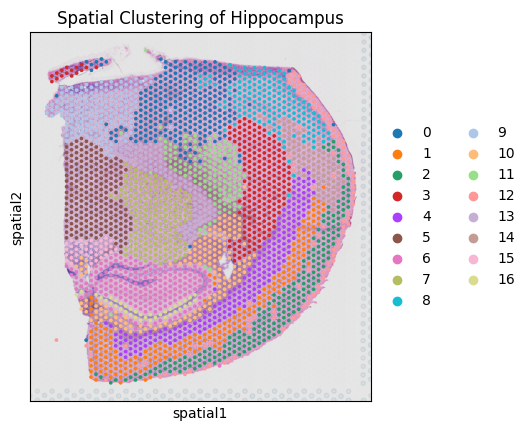

In [11]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

# Load Visium data for the specified sample (make sure to leave backslash after the directory)
visium_path = "/Users/landonwellendorf/Desktop/STAT530/Final/"  # Update with your Visium data path
adata = sc.read_visium(visium_path)

# Preprocessing
sc.pp.filter_cells(adata, min_counts=200)  # Filter low-quality spots
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize counts per spot
sc.pp.log1p(adata)  # Log transformation
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]  # Keep only variable genes

# Dimensionality reduction
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30)  # Build nearest-neighbor graph

# Clustering using Leiden algorithm
sc.tl.leiden(adata, resolution=0.8)  # Adjust resolution to get subregion separation

# Visualize clusters on UMAP
sc.tl.umap(adata)
sc.pl.umap(adata, color="leiden", title="UMAP of Clusters")

# Spatial visualization of clusters
sc.pl.spatial(adata, color="leiden", title="Spatial Clustering of Hippocampus")

plt.show()

/var/folders/3_/kq6fv1_d4gl_n25bl_c016gc0000gn/T/ipykernel_9643/957510291.py:6: FutureWarning: Use `squidpy.read.visium` instead.
  adata = sc.read_visium(visium_path)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndat

Found theta markers: ['Hcn1', 'Slc17a7', 'Grin1', 'Rbfox3', 'Snap25']
Found gamma markers: ['Pvalb', 'Gad1', 'Gad2']


<Figure size 800x800 with 0 Axes>

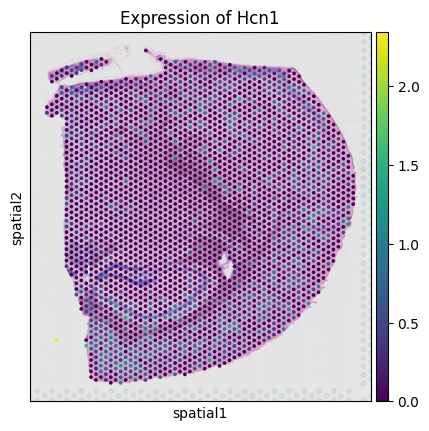

Removing outlier spot CACAGTCCCGCTTCGC-1 with Hcn1 expression value: 2.341661214828491


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/var/folders/3_/kq6fv1_d4gl_n25bl_c016gc0000gn/T/ipykernel_9643/957510291.py:67: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_filtered, color='Hcn1', title='Expression of Hcn1 (Outlier Removed)')


<Figure size 800x800 with 0 Axes>

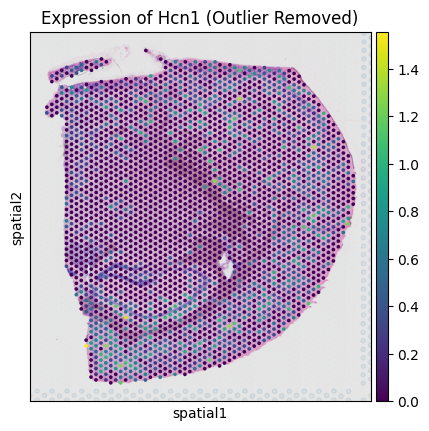

/var/folders/3_/kq6fv1_d4gl_n25bl_c016gc0000gn/T/ipykernel_9643/957510291.py:72: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color=gamma_marker, title=f'Expression of {gamma_marker}')


<Figure size 640x480 with 0 Axes>

<Figure size 800x800 with 0 Axes>

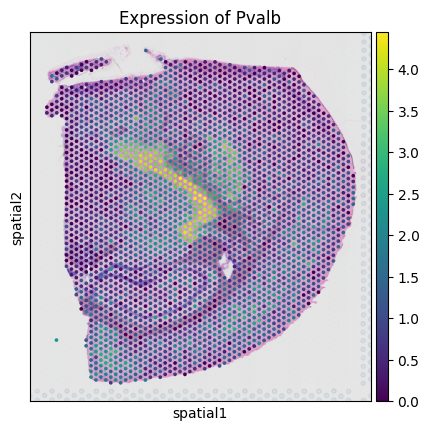

In [12]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

# Load Visium data (uses same path as before, change if necessary)
adata = sc.read_visium(visium_path)

# Basic preprocessing
sc.pp.filter_cells(adata, min_counts=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Key markers identified from scRNA-seq analysis
# Primary markers (single gene approach)
theta_marker = "Hcn1"  # Primary theta marker
gamma_marker = "Pvalb"  # Primary gamma marker

# Define marker sets (combined markers approach)
theta_markers = ["Hcn1", "Slc17a7", "Grin1", "Rbfox3", "Snap25"]
gamma_markers = ["Pvalb", "Gad1", "Gad2"]

# Filter marker sets to include only available genes
theta_markers = [gene for gene in theta_markers if gene in adata.var_names]
gamma_markers = [gene for gene in gamma_markers if gene in adata.var_names]

print(f"Found theta markers: {theta_markers}")
print(f"Found gamma markers: {gamma_markers}")

# Approach 1: Single marker analysis
if theta_marker in adata.var_names and gamma_marker in adata.var_names:
    # Calculate ratio of primary markers
    adata.obs['theta_gamma_ratio'] = adata[:, theta_marker].X.toarray().flatten() / \
                                    (adata[:, gamma_marker].X.toarray().flatten() + 0.1)
    
    # Z-score transformation for better visualization
    adata.obs['theta_gamma_ratio_z'] = zscore(adata.obs['theta_gamma_ratio'])
    
    # Identify spots with high differential expression
    # High theta spots (top 10%)
    theta_threshold = np.percentile(adata.obs['theta_gamma_ratio'], 90)
    adata.obs['high_theta_spots'] = adata.obs['theta_gamma_ratio'] > theta_threshold
    
    # High gamma spots (bottom 10%)
    gamma_threshold = np.percentile(adata.obs['theta_gamma_ratio'], 10)
    adata.obs['high_gamma_spots'] = adata.obs['theta_gamma_ratio'] < gamma_threshold
    
# Visualize primary marker expression
# Plot theta marker expression
plt.figure(figsize=(8, 8))
sc.pl.spatial(adata, color=theta_marker, title=f'Expression of {theta_marker}')
plt.tight_layout()

plt.close()

hcn1_values = adata[:, 'Hcn1'].X.toarray().flatten()
max_idx = np.argmax(hcn1_values)
outlier_spot = adata.obs_names[max_idx]

print(f"Removing outlier spot {outlier_spot} with Hcn1 expression value: {hcn1_values[max_idx]}")

# Create a filtered dataset excluding the outlier
adata_filtered = adata[adata.obs_names != outlier_spot].copy()

# Replot the theta marker expression without the outlier
plt.figure(figsize=(8, 8))
sc.pl.spatial(adata_filtered, color='Hcn1', title='Expression of Hcn1 (Outlier Removed)')
plt.tight_layout()

# Visualize gamma marker expression
plt.figure(figsize=(8, 8))
sc.pl.spatial(adata, color=gamma_marker, title=f'Expression of {gamma_marker}')
plt.tight_layout()
plt.close()

Calculating multi-marker scores with manual approach...
Averaged 6 theta markers
Averaged 4 gamma markers


/var/folders/3_/kq6fv1_d4gl_n25bl_c016gc0000gn/T/ipykernel_9643/1931230663.py:66: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_filtered, color='theta_score', title='Theta Score (Multi-marker)')


<Figure size 800x800 with 0 Axes>

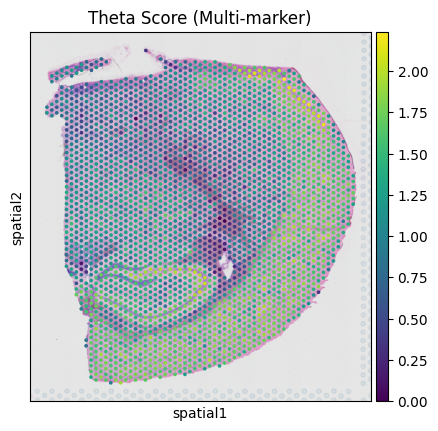

/var/folders/3_/kq6fv1_d4gl_n25bl_c016gc0000gn/T/ipykernel_9643/1931230663.py:72: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata_filtered, color='gamma_score', title='Gamma Score (Multi-marker)')


<Figure size 800x800 with 0 Axes>

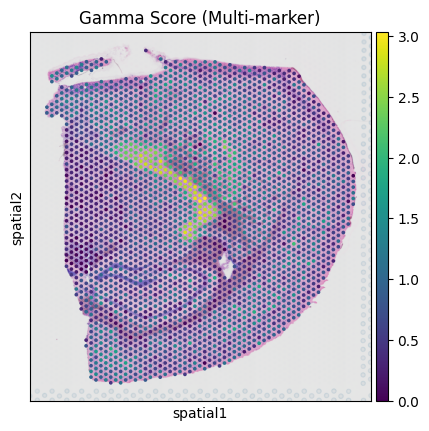

Multi-marker analysis completed


In [13]:
# Approach 2: Combined marker analysis (generally more robust)
# Define marker sets from your scRNA-seq analysis
theta_markers = ["Hcn1", "Slc17a7", "Grin1", "Rbfox3", "Snap25", "Syt1"]
gamma_markers = ["Pvalb", "Gad1", "Gad2", "Kcnc1"]

# Function to get expression for a gene, summing gene expression for each spot
def get_gene_expression(adata, gene_name):
    # Find all occurrences of the gene (exact match)
    matching_indices = [i for i, name in enumerate(adata.var_names) if name == gene_name]
    
    if not matching_indices:
        print(f"Warning: Gene {gene_name} not found")
        return np.zeros(adata.shape[0])
    
    # Sum expression across all matching occurrences
    expr = np.zeros(adata.shape[0])
    for idx in matching_indices:
        expr += adata.X[:, idx].toarray().flatten()
    
    return expr

# Calculate marker scores by manual averaging
print("Calculating multi-marker scores with manual approach...")

# Theta score calculation
theta_expr = np.zeros(adata_filtered.shape[0])
theta_count = 0
for gene in theta_markers:
    gene_expr = get_gene_expression(adata_filtered, gene)
    if np.sum(gene_expr) > 0:  # Only include genes that were found
        theta_expr += gene_expr
        theta_count += 1

if theta_count > 0:
    theta_expr /= theta_count
    print(f"Averaged {theta_count} theta markers")
else:
    print("Warning: No theta markers found")

# Gamma score calculation
gamma_expr = np.zeros(adata_filtered.shape[0])
gamma_count = 0
for gene in gamma_markers:
    gene_expr = get_gene_expression(adata_filtered, gene)
    if np.sum(gene_expr) > 0:  # Only include genes that were found
        gamma_expr += gene_expr
        gamma_count += 1

if gamma_count > 0:
    gamma_expr /= gamma_count
    print(f"Averaged {gamma_count} gamma markers")
else:
    print("Warning: No gamma markers found")

# Store the scores
adata_filtered.obs['theta_score'] = theta_expr
adata_filtered.obs['gamma_score'] = gamma_expr

# Calculate theta/gamma ratio
adata_filtered.obs['theta_gamma_score_ratio'] = theta_expr / (gamma_expr + 0.1)  # Add small constant to avoid division by zero
adata_filtered.obs['theta_gamma_score_ratio_z'] = zscore(adata_filtered.obs['theta_gamma_score_ratio'])

# Generate visualizations
# Visualize the multi-marker theta score
plt.figure(figsize=(8, 8))
sc.pl.spatial(adata_filtered, color='theta_score', title='Theta Score (Multi-marker)')
plt.tight_layout()
plt.close()

# Visualize the multi-marker gamma score
plt.figure(figsize=(8, 8))
sc.pl.spatial(adata_filtered, color='gamma_score', title='Gamma Score (Multi-marker)')
plt.tight_layout()
plt.close()

print("Multi-marker analysis completed")